<a href="https://colab.research.google.com/github/aliiamrr/Crab-Age-Prediction-ML/blob/main/ML_Proj_1(Crab_Data_Set).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [106]:
#IMPORTS
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from scipy.stats import skew, kurtosis, shapiro, kstest
from IPython import get_ipython
from IPython.display import display
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import cross_val_score


#Data visualization, preprocessing and correlation analysis

##Reading the Dataset

In [65]:
#READ THE DATASET
df = pd.read_csv('train.csv')

##Preprocessing


In [66]:
#BASIC EXPLORATION
print(df.head(),'\n')
print(df.info(),'\n')
print(df.describe())

   id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.2875    1.0750  0.3625  19.433582        8.306404   
1   1   F  1.5500    1.2125  0.4250  33.877653       13.706983   
2   2   M  1.3875    1.0625  0.3500  23.388337        9.993199   
3   3   F  1.4375    1.1250  0.4375  27.499015       11.254751   
4   4   M  1.5250    1.2250  0.4250  32.460178       13.919605   

   Viscera Weight  Shell Weight   Age  
0        4.309124      6.662133   9.0  
1        6.676307     10.064072  14.0  
2        5.556502      5.811648  11.0  
3        5.329706      7.937860  22.0  
4        7.569317      8.788345  10.0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15000 non-null  int64  
 1   Sex             15000 non-null  object 
 2   Length          15000 non-null  float64
 3   Diameter        15000 

##Visualizing the distribution of the features



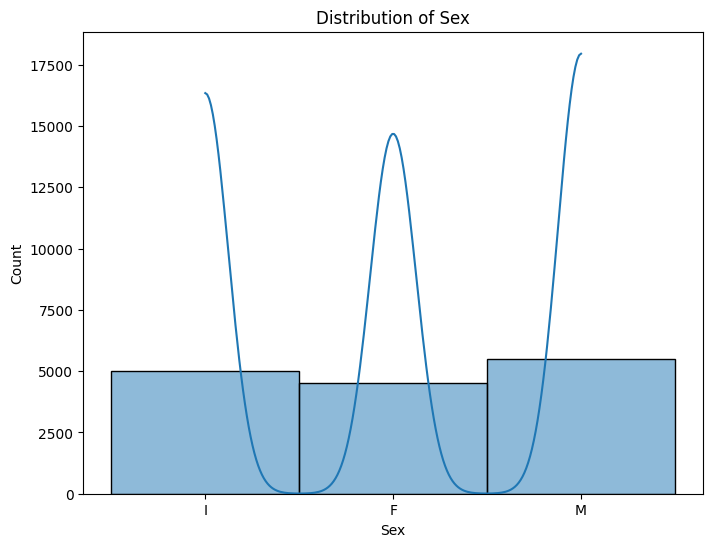

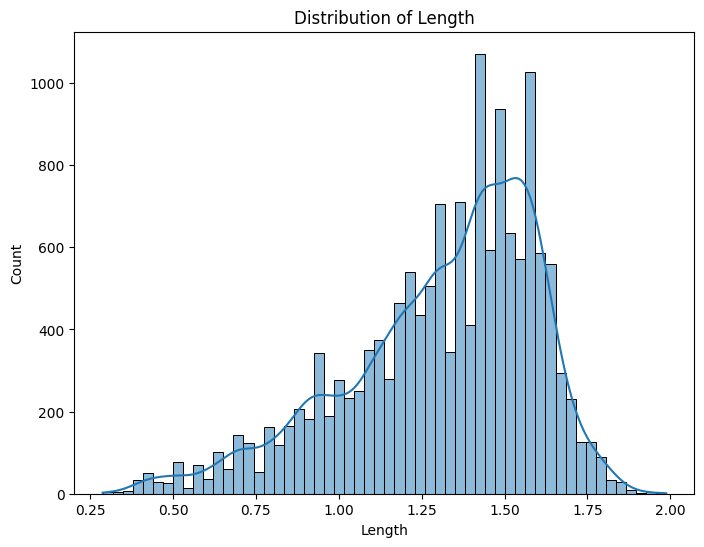

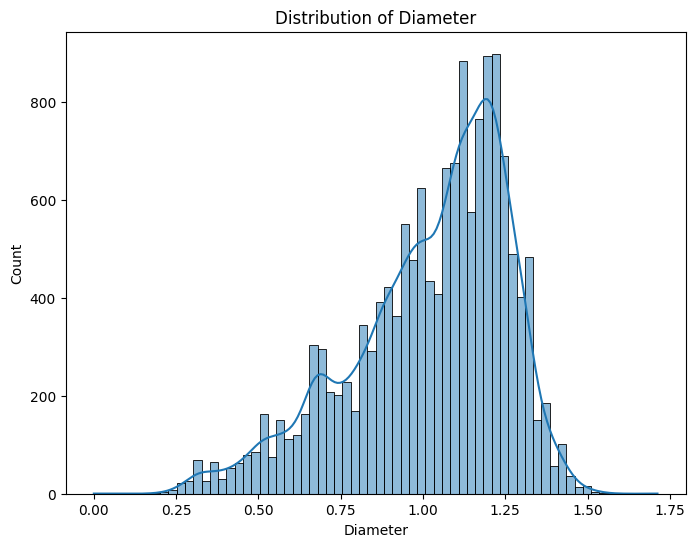

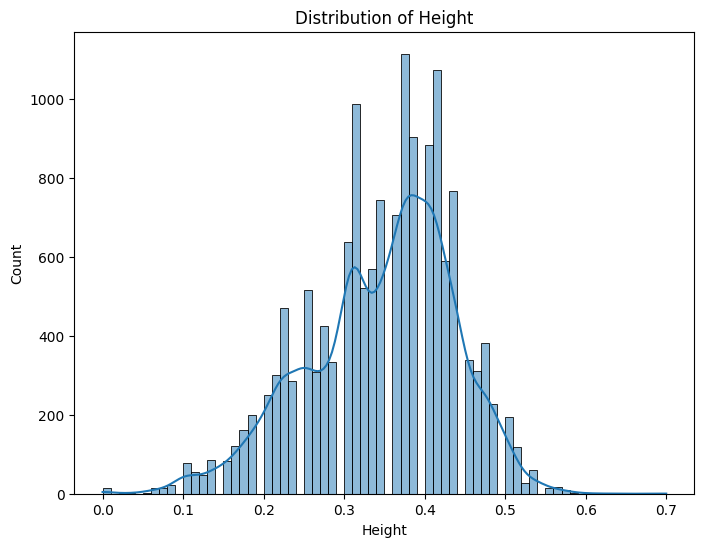

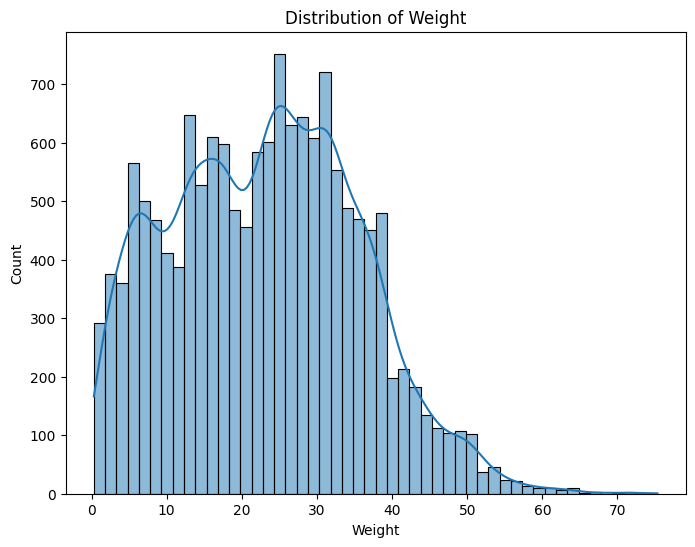

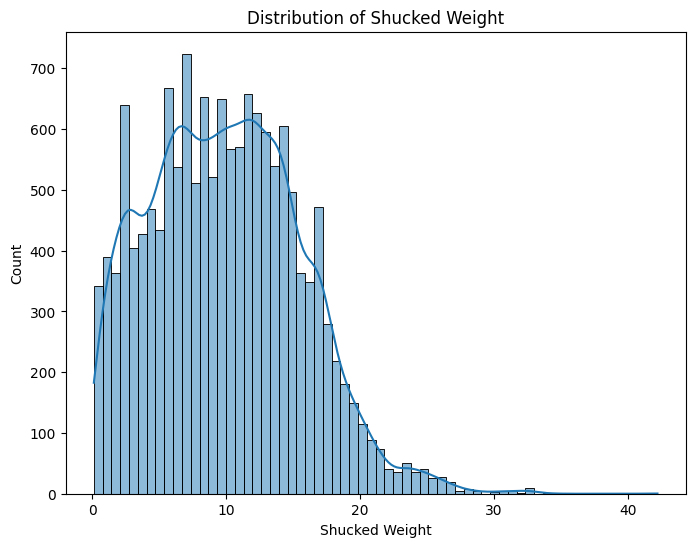

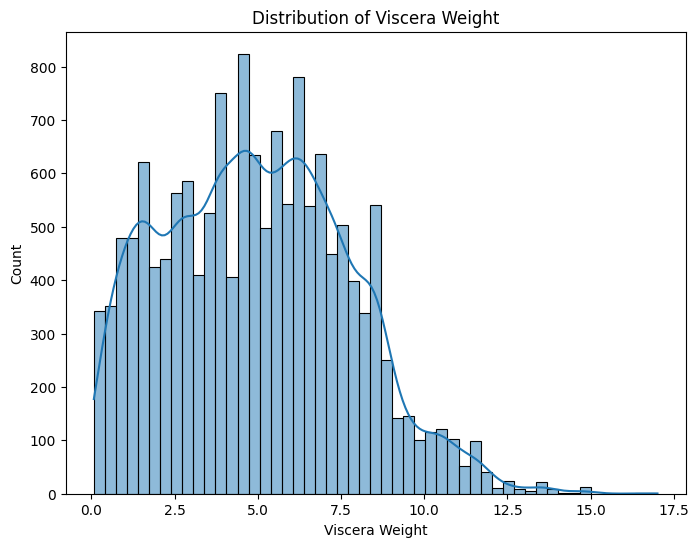

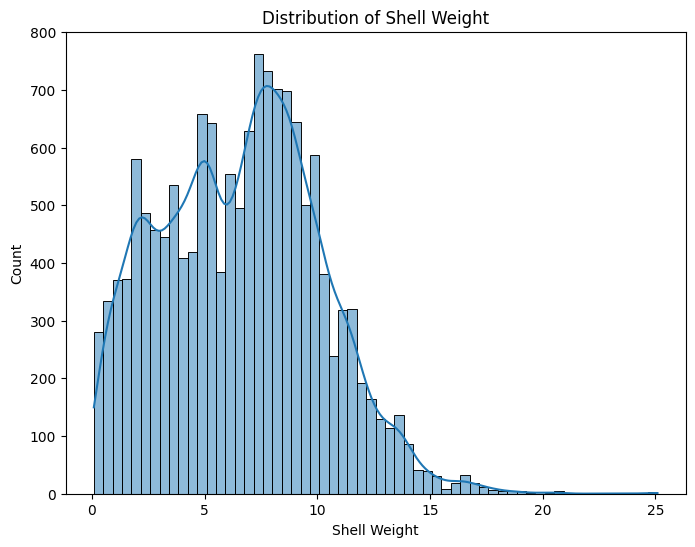

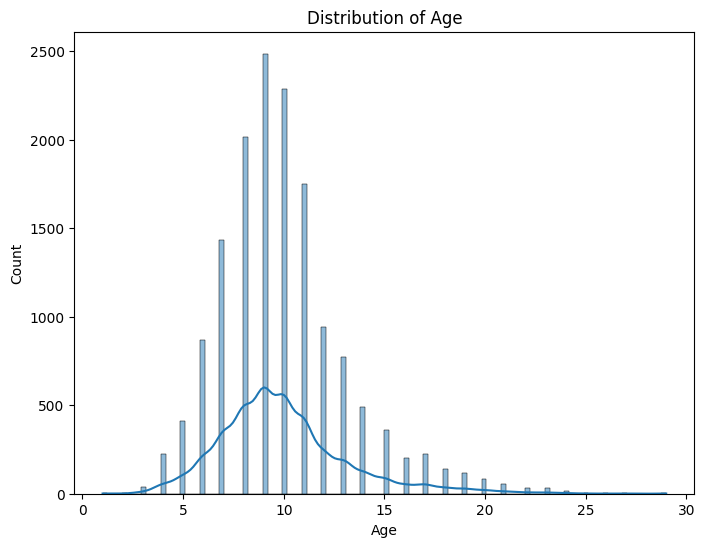

In [67]:
#HISTOGRAM
for column in df.columns:
  if column != 'id':
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

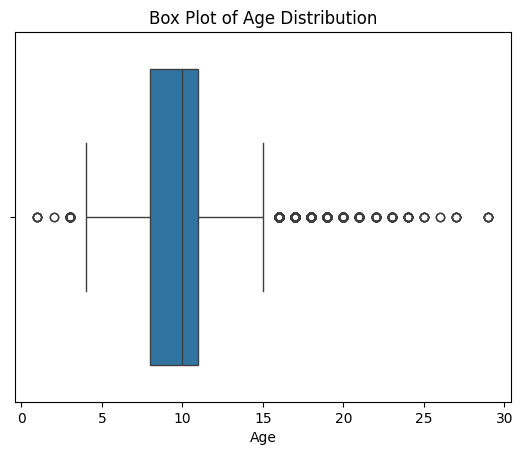

In [68]:
#BOX PLOT
sns.boxplot(x='Age', data=df)
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.show()

In [69]:
target_data = df['Age']
# Check for normality using Shapiro-Wilk test
shapiro_test = stats.shapiro(target_data)
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

# Check for normality using Kolmogorov-Smirnov test
kstest = stats.kstest(target_data, 'norm')
print("Kolmogorov-Smirnov Test:")
print("Statistic:", kstest.statistic)
print("p-value:", kstest.pvalue)

# Calculate skewness and kurtosis
skewness = target_data.skew()
kurtosis = target_data.kurtosis()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Shapiro-Wilk Test:
Statistic: 0.9300851265561626
p-value: 2.1370806484064303e-63
Kolmogorov-Smirnov Test:
Statistic: 0.9981834353017033
p-value: 0.0
Skewness: 1.1290848802136635
Kurtosis: 2.41932750848648


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15000.
  res = hypotest_fun_out(*samples, **kwds)


##Handling Outliers using IQR

In [70]:
numeric_features = ['Length', 'Diameter', 'Height', 'Weight',
                   'Shucked Weight', 'Viscera Weight', 'Shell Weight'
                   ]

In [71]:
def handle_outliers_iqr(df, features):

    df_cleaned = df.copy()

    for feature in features:

        Q1 = df_cleaned[feature].quantile(0.25)
        Q3 = df_cleaned[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        outliers = df_cleaned[(df_cleaned[feature] < lower_bound) | (df_cleaned[feature] > upper_bound)]


        print(f'Outliers in {feature}:', len(outliers))


        df_cleaned[feature] = np.where(df_cleaned[feature] < lower_bound, lower_bound, df_cleaned[feature])
        df_cleaned[feature] = np.where(df_cleaned[feature] > upper_bound, upper_bound, df_cleaned[feature])

    return df_cleaned


df_cleaned = handle_outliers_iqr(df, numeric_features)


Outliers in Length: 280
Outliers in Diameter: 272
Outliers in Height: 74
Outliers in Weight: 36
Outliers in Shucked Weight: 71
Outliers in Viscera Weight: 51
Outliers in Shell Weight: 61


In [72]:
total_null_values = df_cleaned.isnull().sum().sum()
print("Total number of null values in the dataset:", total_null_values)

Total number of null values in the dataset: 0


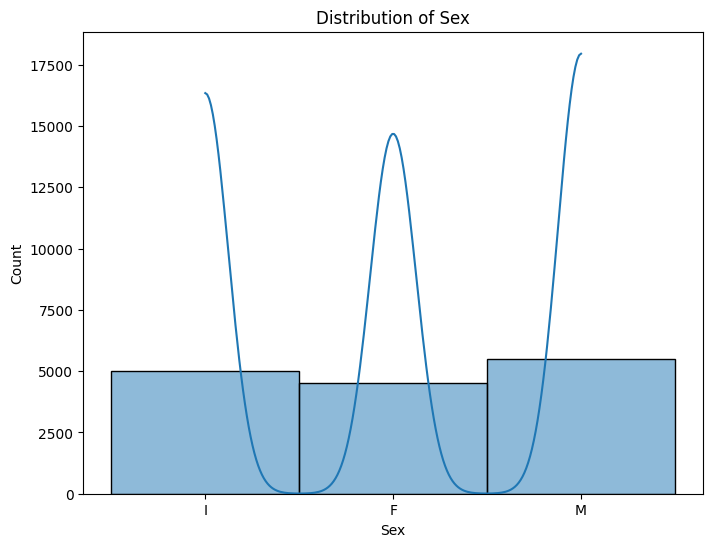

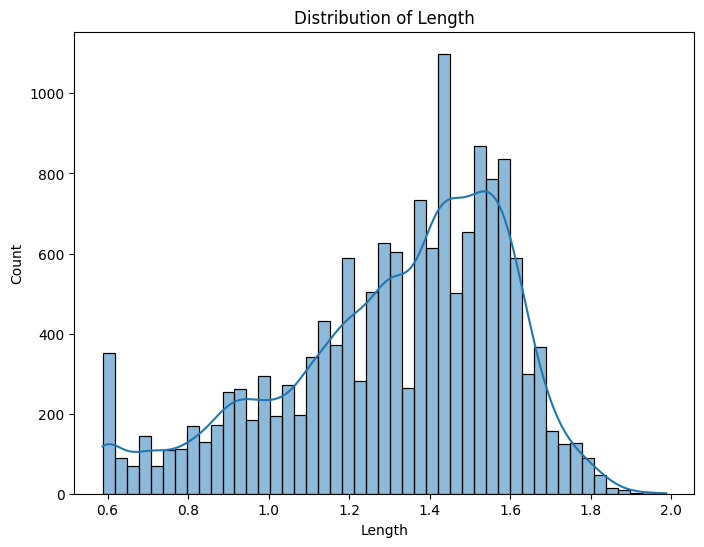

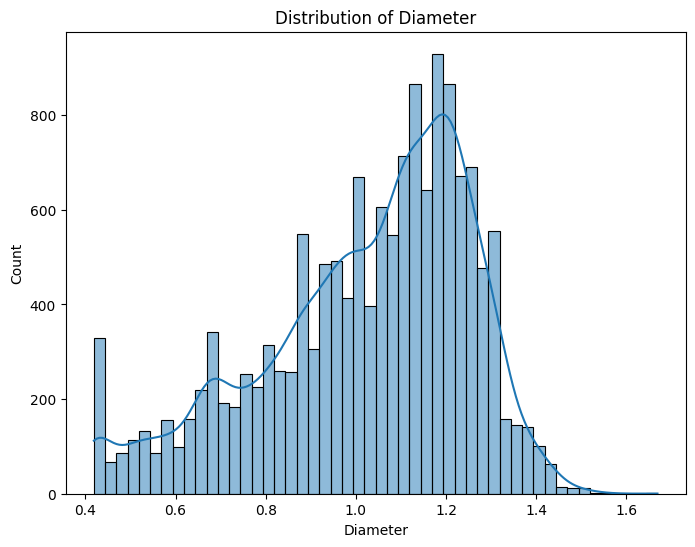

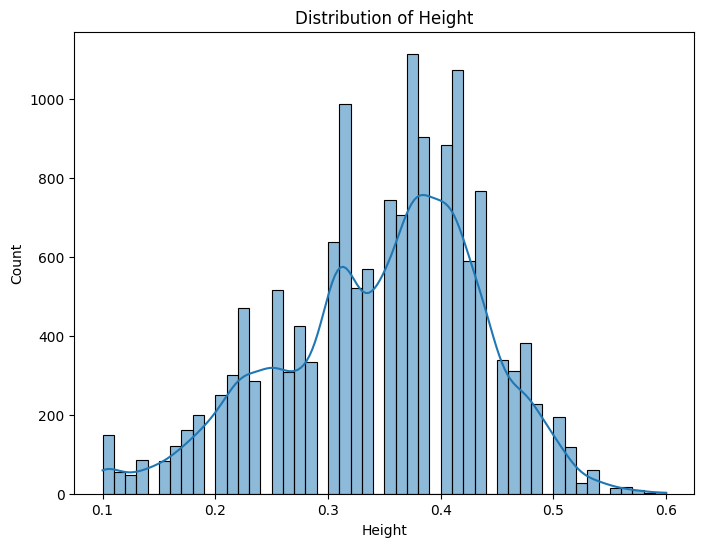

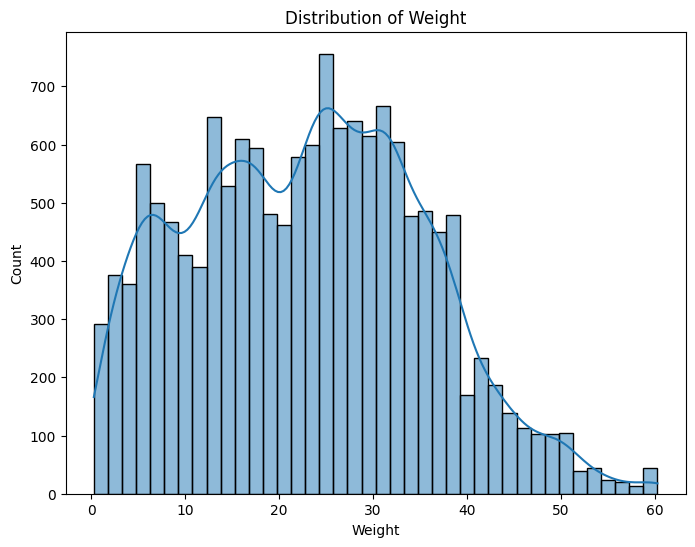

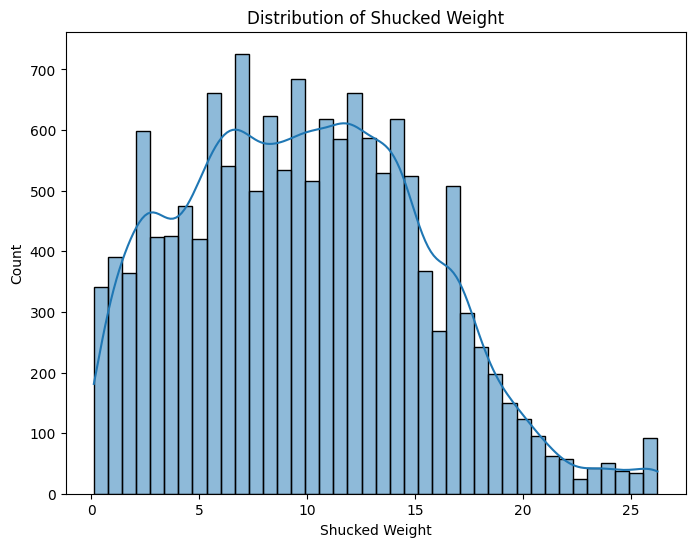

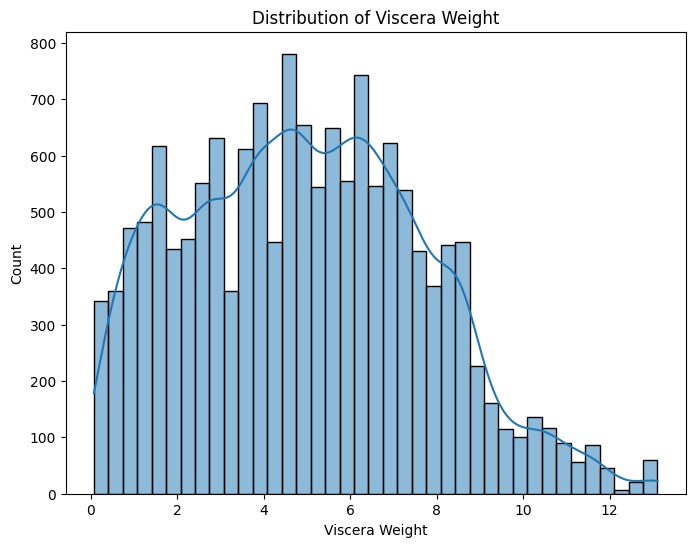

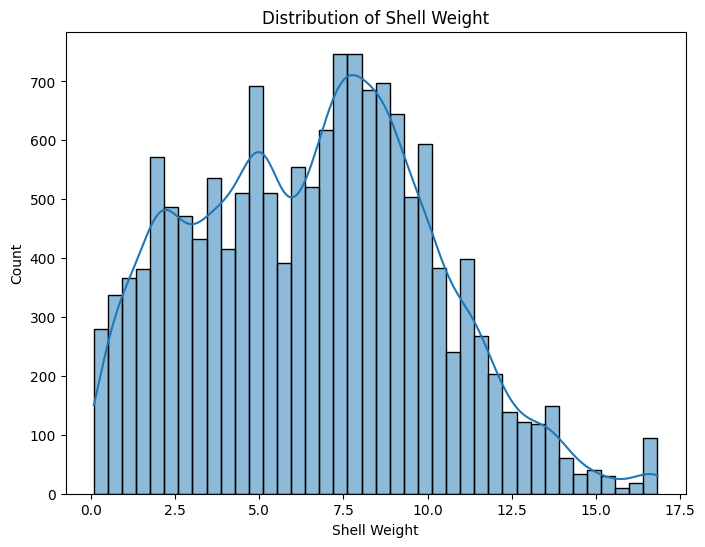

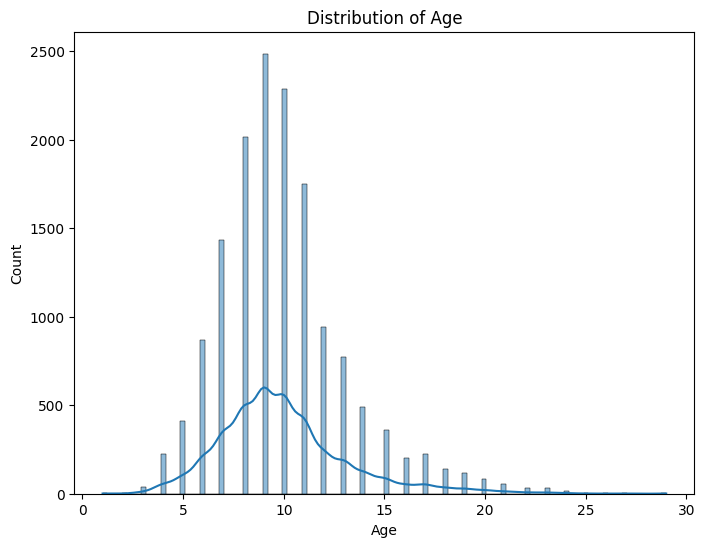

In [73]:
#HISTOGRAM
for column in df_cleaned.columns:
  if column != 'id':
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

In [74]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15000 non-null  int64  
 1   Sex             15000 non-null  object 
 2   Length          15000 non-null  float64
 3   Diameter        15000 non-null  float64
 4   Height          15000 non-null  float64
 5   Weight          15000 non-null  float64
 6   Shucked Weight  15000 non-null  float64
 7   Viscera Weight  15000 non-null  float64
 8   Shell Weight    15000 non-null  float64
 9   Age             15000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


##One Hot Encoding

In [75]:
#CONVERT SEX TO A NUMERICAL FEAUTURE USING ONE HOT ENCODING
df_cleaned = pd.get_dummies(df, columns=['Sex'], drop_first=True)

##Standardizing Numerical Feautures

In [76]:
#STANDARDIZING THE DATA
def scale(df):
  numeric_features = ['Length', 'Diameter', 'Height', 'Weight',
                   'Shucked Weight', 'Viscera Weight', 'Shell Weight'
                   ]
  scaler = RobustScaler()
  df[numeric_features] = scaler.fit_transform(df[numeric_features])
  return df

##Analyzing feature importances using Random Forest

In [77]:
model = RandomForestRegressor()
X = df_cleaned.drop(columns=['Age', 'id'])
y = df_cleaned['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
print("Random Forest Results:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")



Random Forest Results:
Length: 0.039306205850737144
Diameter: 0.03683935857133
Height: 0.08219549249207868
Weight: 0.09636606668052322
Shucked Weight: 0.15426959965882336
Viscera Weight: 0.07067669301264479
Shell Weight: 0.4959275099693684
Sex_I: 0.0162599171965596
Sex_M: 0.008159156567934806


In [78]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
feature_names = X_test.columns
forest_importances = pd.Series(result.importances_mean, index=feature_names)
print("Permutation Importance results:")
for feature, importance in zip(feature_names, importances):
  print(f"{feature}: {importance:.3f}")


Permutation Importance results:
Length: 0.039
Diameter: 0.037
Height: 0.082
Weight: 0.096
Shucked Weight: 0.154
Viscera Weight: 0.071
Shell Weight: 0.496
Sex_I: 0.016
Sex_M: 0.008


##Analyzing the correlation between features

In [79]:
#CALCULATE AND DISPLAY CORRELATION MATRIX
correlation_matrix = df_cleaned.corr()
print("Correlation Matrix results:")
print(correlation_matrix)


Correlation Matrix results:
                      id    Length  Diameter    Height    Weight  \
id              1.000000 -0.000549 -0.000297 -0.001960 -0.000134   
Length         -0.000549  1.000000  0.991766  0.934141  0.938050   
Diameter       -0.000297  0.991766  1.000000  0.936500  0.939962   
Height         -0.001960  0.934141  0.936500  1.000000  0.915395   
Weight         -0.000134  0.938050  0.939962  0.915395  1.000000   
Shucked Weight -0.000914  0.913607  0.912383  0.871371  0.970024   
Viscera Weight  0.002226  0.920136  0.920553  0.896615  0.972999   
Shell Weight   -0.001184  0.920366  0.925611  0.919334  0.967680   
Age            -0.009181  0.619932  0.627211  0.663039  0.610977   
Sex_I          -0.003658 -0.672572 -0.678027 -0.667699 -0.663938   
Sex_M          -0.000799  0.325454  0.326021  0.318029  0.314957   

                Shucked Weight  Viscera Weight  Shell Weight       Age  \
id                   -0.000914        0.002226     -0.001184 -0.009181   
Length 

##Analyzing the distribution of the features

In [80]:
#CHECKING DISTRIBUTION OF FEATURES FOR TRANSFORMATIONS
# Calculate skewness and kurtosis
print("Skewness:")
print(df_cleaned.skew())
print("Kurtosis:")
print(df_cleaned.kurtosis())

# Test for normality
for column in df_cleaned.columns:
    if column != 'Age' or column != 'id':
      print(f"Shapiro-Wilk Test for {column}:")
      print(shapiro(df_cleaned[column]))
      print(f"Kolmogorov-Smirnov Test for {column}:")


Skewness:
id                0.000000
Length           -0.837403
Diameter         -0.807483
Height           -0.493707
Weight            0.233422
Shucked Weight    0.395114
Viscera Weight    0.309460
Shell Weight      0.266079
Age               1.129085
Sex_I             0.705587
Sex_M             0.554321
dtype: float64
Kurtosis:
id               -1.200000
Length            0.291420
Diameter          0.181440
Height            0.032142
Weight           -0.460833
Shucked Weight   -0.061239
Viscera Weight   -0.379808
Shell Weight     -0.196507
Age               2.419328
Sex_I            -1.502347
Sex_M            -1.692954
dtype: float64
Shapiro-Wilk Test for id:
ShapiroResult(statistic=0.9549240965509725, pvalue=5.024179061278716e-55)
Kolmogorov-Smirnov Test for id:
Shapiro-Wilk Test for Length:
ShapiroResult(statistic=0.94685374040195, pvalue=4.2797411976012495e-58)
Kolmogorov-Smirnov Test for Length:
Shapiro-Wilk Test for Diameter:
ShapiroResult(statistic=0.9479263412435756, pvalue=1.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15000.
  res = hypotest_fun_out(*samples, **kwds)


##Performing log transformation for skewed features

In [81]:
def transform_features(df):
  df_transformed = df.copy()

  # Log transformation for skewed features
  skewed_features = ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
  for feature in skewed_features:
      df_transformed[feature] = np.log(df_transformed[feature] + 1)

  return df_transformed

##Feature Engineering

###Method for train data set

In [82]:
def feature_engineering(df):

    # Step 1: Drop highly correlated features
    correlated_features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight']

    df_reduced = df.copy()

    # Step 2: Create a composite feature for total weight
    df_reduced['Total Weight'] = (
        df['Weight'] + df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight']
    )

    # Step 3: Create interaction features between Age and Total Weight
    df_reduced['Total_Weight_Shell_Weight_Interaction'] = df_reduced['Total Weight'] * df['Shell Weight']
    df_reduced = df_reduced.drop(columns=['Age', 'id','Sex_M','Sex_F'], errors='ignore')
    df_reduced = df_reduced.drop(columns=correlated_features, errors='ignore')

    return df_reduced



###Method for test data set

In [83]:
def feature_engineering_test(df):

    # Step 1: Drop highly correlated features
    correlated_features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight']
    df_reduced = df.drop(columns=correlated_features, errors='ignore')

    # Step 2: Create a composite feature for total weight
    df_reduced['Total Weight'] = (
        df['Weight'] + df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight']
    )
    df_reduced['Total_Weight_Shell_Weight_Interaction'] = df_reduced['Total Weight'] * df['Shell Weight']
    df_reduced = df_reduced.drop(columns=['id','Sex_M,'], errors='ignore')
    return df_reduced



#Training the Models

In [84]:
df_transformed = transform_features(df_cleaned)
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15000 non-null  int64  
 1   Length          15000 non-null  float64
 2   Diameter        15000 non-null  float64
 3   Height          15000 non-null  float64
 4   Weight          15000 non-null  float64
 5   Shucked Weight  15000 non-null  float64
 6   Viscera Weight  15000 non-null  float64
 7   Shell Weight    15000 non-null  float64
 8   Age             15000 non-null  float64
 9   Sex_I           15000 non-null  bool   
 10  Sex_M           15000 non-null  bool   
dtypes: bool(2), float64(8), int64(1)
memory usage: 1.1 MB


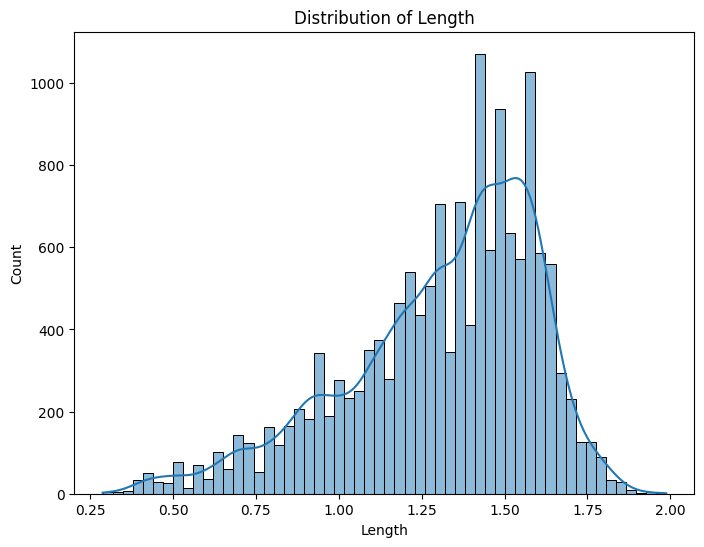

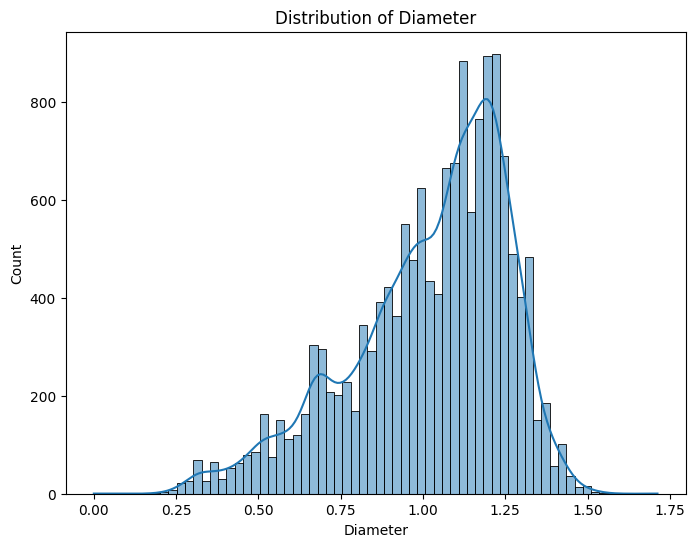

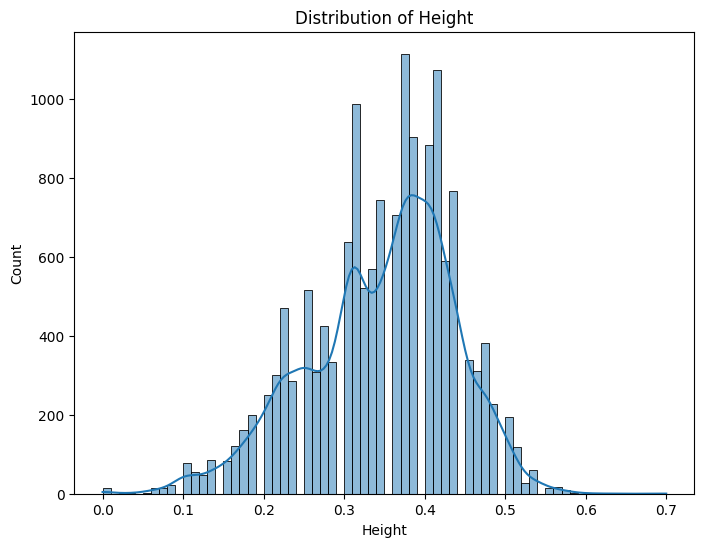

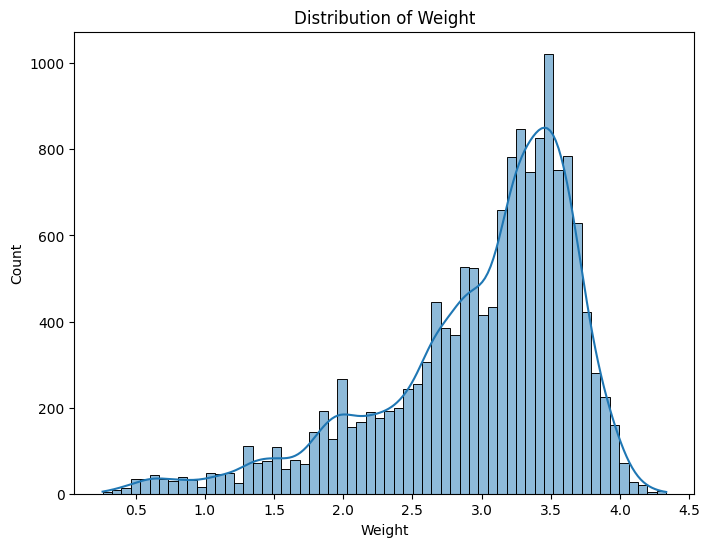

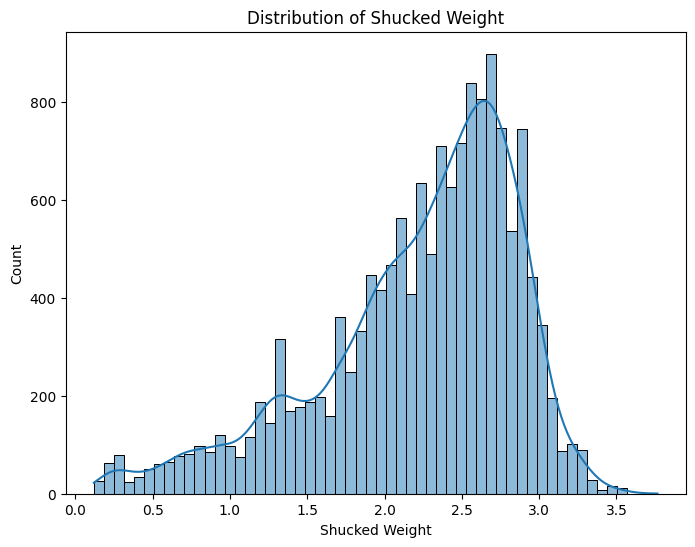

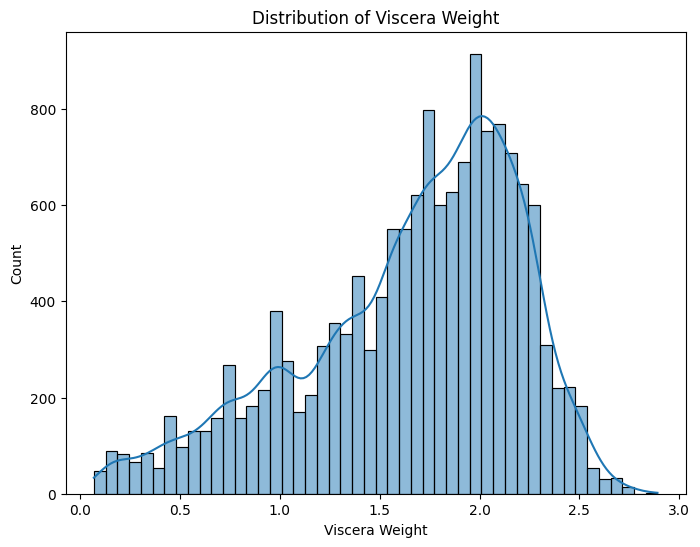

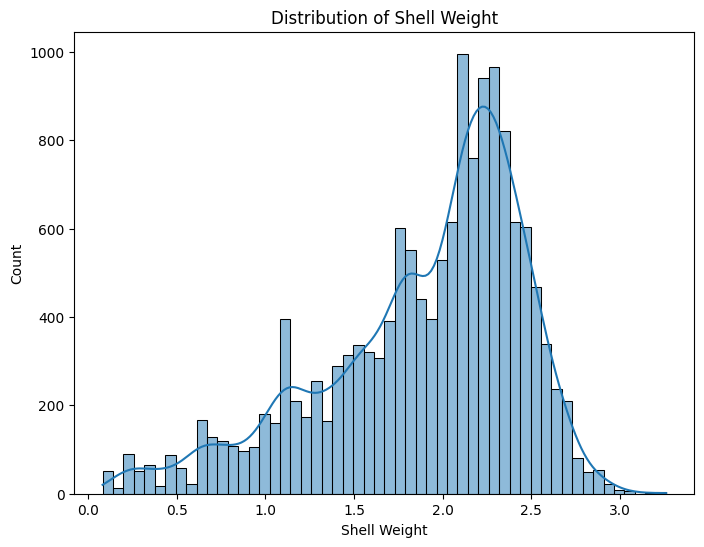

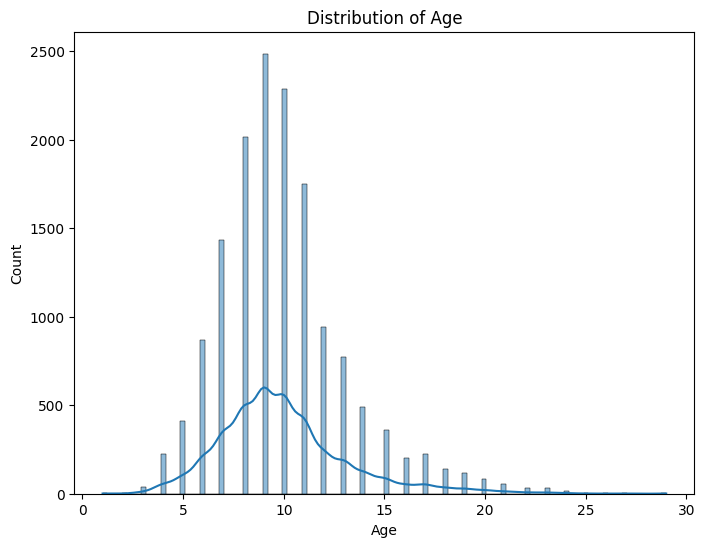

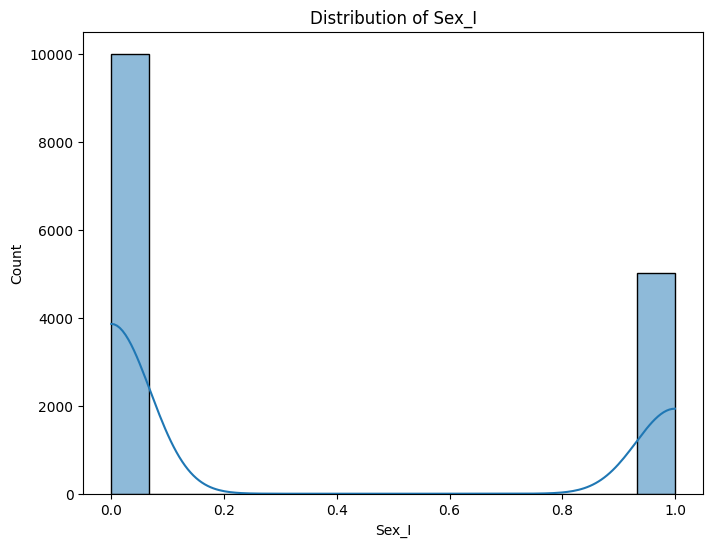

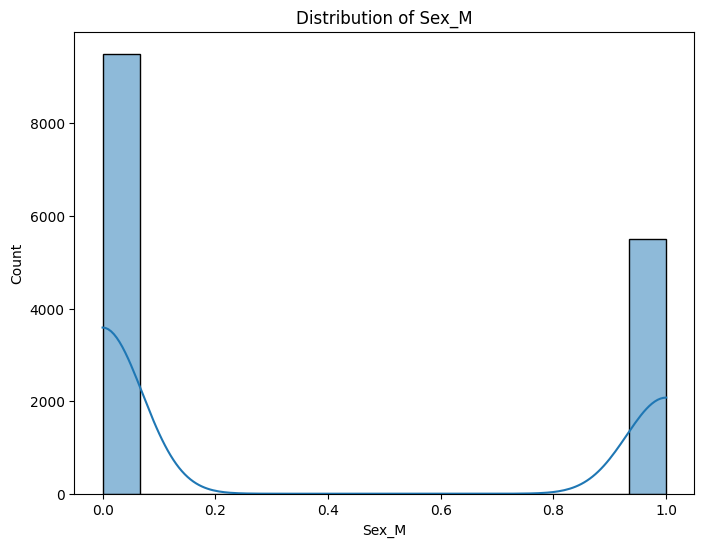

In [85]:
for column in df_transformed.columns:
  if column != 'id':
    plt.figure(figsize=(8, 6))
    sns.histplot(df_transformed[column], kde=True)
    plt.title(f'Distribution of {column}')

In [86]:
#TRAIN/VALIDATION SET SPLIT
# Apply feature engineering to the DataFrame
df_engineered = scale(df_transformed)
df_engineered = feature_engineering(df_engineered)


In [87]:
X = df_engineered
y = df['Age']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

##Ridge

In [109]:
#RIDGE

ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]}
ridge_grid = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

best_ridge_alpha = ridge_grid.best_params_['alpha']
print("Best Ridge Parameters:",best_ridge_alpha)

# PREDICTING WITH THE BEST MODEL
y_pred_ridge_best = ridge_grid.best_estimator_.predict(X_val)
mae_ridge_best = mean_absolute_error(y_val, y_pred_ridge_best)
print("Ridge Mean Absolute Error with Best Parameters:", mae_ridge_best)


Best Ridge Parameters: 10
Ridge Mean Absolute Error with Best Parameters: 1.5679131884657678


##LASSO

In [89]:
#LASSO
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
lasso_grid = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

best_lasso_alpha = lasso_grid.best_params_['alpha']
print("Best Lasso Parameters:",best_lasso_alpha)

# PREDICTING WITH THE BEST MODEL
y_pred_lasso_best = lasso_grid.best_estimator_.predict(X_val)
mae_lasso_best = mean_absolute_error(y_val, y_pred_lasso_best)
print("Lasso Mean Absolute Error with Best Parameters:", mae_lasso_best)

Best Lasso Parameters: 0.01
Lasso Mean Absolute Error with Best Parameters: 1.5633317114564522


##Elastic Net


In [90]:
#ELASTIC NET
elastic_net_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100,1000,10000],
                           'l1_ratio': [0.1, 0.5, 0.9, 1.0]}
elastic_net_grid = GridSearchCV(ElasticNet(), elastic_net_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
elastic_net_grid.fit(X_train, y_train)

best_elastic_net_alpha = elastic_net_grid.best_params_['alpha']
best_elastic_net_l1_ratio = elastic_net_grid.best_params_['l1_ratio']

print("Best Elastic Net Parameters:", elastic_net_grid.best_params_)

# PREDICTING WITH THE BEST MODEL
y_pred_en_best = elastic_net_grid.best_estimator_.predict(X_val)
mae_en_best = mean_absolute_error(y_val, y_pred_en_best)
print("Elastic Net Mean Absolute Error with Best Parameters:", mae_en_best)

Best Elastic Net Parameters: {'alpha': 0.01, 'l1_ratio': 0.9}
Elastic Net Mean Absolute Error with Best Parameters: 1.5599473933659591


##Polynomial Regression

In [91]:
degrees = range(1, 5)

In [92]:
#POLYNOMIAL REGRESSION
mae_list = []

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train_poly, y_train)

    y_pred_poly = poly_reg_model.predict(X_val_poly)

    mae_poly = mean_absolute_error(y_val, y_pred_poly)
    mae_list.append(mae_poly)
    print(f"Degree: {degree}, MAE: {mae_poly}")

best_degree = degrees[np.argmin(mae_list)]
best_mae = min(mae_list)

print(f"Best degree: {best_degree}, with MAE: {best_mae}")




Degree: 1, MAE: 1.5740463745692268
Degree: 2, MAE: 1.4974138018932177
Degree: 3, MAE: 1.4865644129119109
Degree: 4, MAE: 1.4796951523765625
Best degree: 4, with MAE: 1.4796951523765625


##Hybrid Models

###Polynomial - Ridge

In [93]:
#POLY - RIDGE
poly_ridge_mae_list = []
for degree in degrees:

      ridge_poly_model = make_pipeline(PolynomialFeatures(degree=degree),
                                      Ridge(alpha=best_ridge_alpha))
      ridge_poly_model.fit(X_train, y_train)

      y_pred_ridge_poly = ridge_poly_model.predict(X_val)
      mae_ridge_poly = mean_absolute_error(y_val, y_pred_ridge_poly)
      poly_ridge_mae_list.append(mae_ridge_poly)

      print(f"Degree: {degree}, MAE: {mae_ridge_poly}")

best_degree = degrees[np.argmin(poly_ridge_mae_list)]
best_mae = min(poly_ridge_mae_list)
print(f"Best degree: {best_degree}, with MAE: {best_mae}")

Degree: 1, MAE: 1.567913188465766
Degree: 2, MAE: 1.5074687677781622
Degree: 3, MAE: 1.4953676495852706
Degree: 4, MAE: 1.4938405298628847
Best degree: 4, with MAE: 1.4938405298628847


###Polynomial - Lasso

In [94]:
#POLY - LASSO
poly_lasso_mae_list = []
for degree in degrees:

      lasso_poly_model = make_pipeline(PolynomialFeatures(degree=degree),
                                      Lasso(alpha=best_lasso_alpha))
      lasso_poly_model.fit(X_train, y_train)

      y_pred_lasso_poly = lasso_poly_model.predict(X_val)
      mae_lasso_poly = mean_absolute_error(y_val, y_pred_lasso_poly)
      poly_lasso_mae_list.append(mae_lasso_poly)

      print(f"Degree: {degree}, MAE: {mae_lasso_poly}")

best_degree = degrees[np.argmin(poly_lasso_mae_list)]
best_mae = min(poly_lasso_mae_list)
print(f"Best degree: {best_degree}, with MAE: {best_mae}")


Degree: 1, MAE: 1.5633317114564518


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.806e+03, tolerance: 1.231e+01
  model = cd_fast.enet_coordinate_descent(


Degree: 2, MAE: 1.5137540432068866


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+04, tolerance: 1.231e+01
  model = cd_fast.enet_coordinate_descent(


Degree: 3, MAE: 1.51183967844763
Degree: 4, MAE: 1.5119181499268415
Best degree: 3, with MAE: 1.51183967844763


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.817e+04, tolerance: 1.231e+01
  model = cd_fast.enet_coordinate_descent(


###Polynomial - Elastic Net

In [95]:
#POLY - ELASTIC NET
poly_en_mae_list = []
for degree in degrees:

      elastic_net_poly_model = make_pipeline(PolynomialFeatures(degree=degree),
                                      ElasticNet(alpha=best_elastic_net_alpha, l1_ratio=best_elastic_net_l1_ratio))
      elastic_net_poly_model.fit(X_train, y_train)

      y_pred_en_poly = elastic_net_poly_model.predict(X_val)
      mae_en_poly = mean_absolute_error(y_val, y_pred_en_poly)
      poly_en_mae_list.append(mae_en_poly)

      print(f"Degree: {degree}, MAE: {mae_en_poly}")

best_degree = degrees[np.argmin(poly_en_mae_list)]
best_mae = min(poly_en_mae_list)
print(f"Best degree: {best_degree}, with MAE: {best_mae}")

Degree: 1, MAE: 1.5599473933659591


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.695e+03, tolerance: 1.231e+01
  model = cd_fast.enet_coordinate_descent(


Degree: 2, MAE: 1.5138119552752904


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.369e+04, tolerance: 1.231e+01
  model = cd_fast.enet_coordinate_descent(


Degree: 3, MAE: 1.5124976785869948
Degree: 4, MAE: 1.512522197265951
Best degree: 3, with MAE: 1.5124976785869948


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e+04, tolerance: 1.231e+01
  model = cd_fast.enet_coordinate_descent(


#Testing and Submission

In [123]:
# Load the test dataset
test_df = pd.read_csv('test.csv')

# Preprocess the test data
test_df = handle_outliers_iqr(test_df, numeric_features)
test_df = pd.get_dummies(test_df, columns=['Sex'], drop_first=True)
test_df_scaled = scale(test_df)
test_df_engineered = feature_engineering(test_df_scaled)

# Use the best model
X_test_poly = poly.transform(test_df_engineered)

ridge_poly_model = make_pipeline(PolynomialFeatures(degree=best_degree), Ridge(alpha=best_ridge_alpha))
ridge_poly_model.fit(X_train, y_train)

# Predict on test set
predicted_age = ridge_poly_model.predict(test_df_engineered)

# Prepare submission
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'predicted_age': predicted_age
})
submission_df.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' has been created.")

Outliers in Length: 164
Outliers in Diameter: 170
Outliers in Height: 46
Outliers in Weight: 22
Outliers in Shucked Weight: 38
Outliers in Viscera Weight: 33
Outliers in Shell Weight: 43
Submission file 'submission.csv' has been created.
